# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_mouse=pd.merge(mouse_metadata,study_results)
# Display the data table for preview
display(study_mouse)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_count = len(study_mouse['Mouse ID'].unique())
print(mouse_count)



249


In [34]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=study_mouse.loc[study_mouse.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = study_mouse.loc[study_mouse["Mouse ID"] == "g989", :]
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=study_mouse.drop(labels = range(908,921))
clean_df = clean_df.reset_index()
clean_df



,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_clean_df = len(clean_df['Mouse ID'].unique())
print(mice_clean_df)



248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_drug_regimen = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_drug_regimen=clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
variance_drug_regimen=clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_drug_regimen=clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_drug_regimen=clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_table=pd.DataFrame({'Mean Tumor Volume':mean_drug_regimen,
                               'Median Tumor Volume':median_drug_regimen,
                               'Tumor Volume Variance':variance_drug_regimen,
                               'Tumor Volume Std. Dev.':std_drug_regimen,
                               'Tumor Volume Std. Err.':sem_drug_regimen})
summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_aggre= clean_df.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
                                                                        

summary_aggre


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

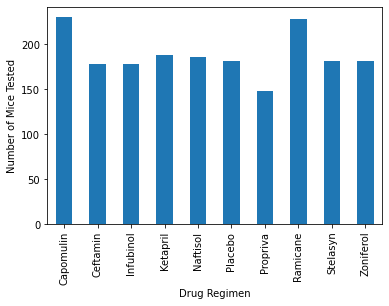

In [86]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
TP=clean_df.groupby('Drug Regimen').count()['Mouse ID']
TP
TP.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
#TP.sort_values(by=['Drug Regimen’])





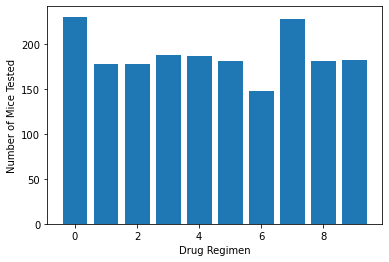

In [107]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

labels = 'Drug Regimen','Number of Mice Tested'
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.bar(range(len(TP)), TP) 
plt.show()



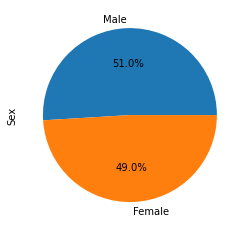

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df["Sex"].value_counts()
gender.plot.pie(autopct= "%1.1f%%")
plt.show()


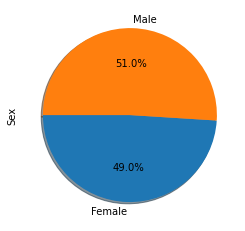

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot.
labels = 'Female', 'Male'
sizes = [49, 51]
plt.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=180)
plt.ylabel('Sex')

plt.show()


## Quartiles, Outliers and Boxplots

In [184]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftaminmax
Capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

max_tumor_1=Aapomulin.groupby(['Mouse ID'])['Timepoint'].max() 
max_tumor_1=max_tumor.reset_index()
max_tumor_1

# Start by getting the last (greatest) timepoint for each mouse
merge_data_1=max_tumor.merge(clean_df,on=['Mouse ID','Timepoint'],how='left')
merge_data_1.head(5)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,327,Ramicane,Male,3,22,38.407618,1
1,a444,45,430,Ramicane,Female,10,25,43.047543,0
2,a520,45,214,Ramicane,Male,13,21,38.810366,1
3,a644,45,174,Ramicane,Female,7,17,32.978522,1
4,c458,30,289,Ramicane,Female,23,20,38.342008,2


In [180]:
max_tumor_2=Infubinol.groupby(['Mouse ID'])['Timepoint'].max() 
max_tumor_2=max_tumor.reset_index()
max_tumor_2
merge_data_2=max_tumor.merge(clean_df,on=['Mouse ID','Timepoint'],how='left')
merge_data_2.head(5)

,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,327,Ramicane,Male,3,22,38.407618,1
1,a444,45,430,Ramicane,Female,10,25,43.047543,0
2,a520,45,214,Ramicane,Male,13,21,38.810366,1
3,a644,45,174,Ramicane,Female,7,17,32.978522,1
4,c458,30,289,Ramicane,Female,23,20,38.342008,2


In [181]:
max_tumor_3=Ceftamin.groupby(['Mouse ID'])['Timepoint'].max() 
max_tumor_3=max_tumor.reset_index()
max_tumor_3
merge_data_3=max_tumor.merge(clean_df,on=['Mouse ID','Timepoint'],how='left')
merge_data_3.head(5)

,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,327,Ramicane,Male,3,22,38.407618,1
1,a444,45,430,Ramicane,Female,10,25,43.047543,0
2,a520,45,214,Ramicane,Male,13,21,38.810366,1
3,a644,45,174,Ramicane,Female,7,17,32.978522,1
4,c458,30,289,Ramicane,Female,23,20,38.342008,2


In [182]:
max_tumor_4=Ramicane.groupby(['Mouse ID'])['Timepoint'].max() 
max_tumor_4=max_tumor.reset_index()
max_tumor_4
merge_data_4=max_tumor.merge(clean_df,on=['Mouse ID','Timepoint'],how='left')
merge_data_4.head(5)

,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,327,Ramicane,Male,3,22,38.407618,1
1,a444,45,430,Ramicane,Female,10,25,43.047543,0
2,a520,45,214,Ramicane,Male,13,21,38.810366,1
3,a644,45,174,Ramicane,Female,7,17,32.978522,1
4,c458,30,289,Ramicane,Female,23,20,38.342008,2


In [249]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)

Capomulin_1 = Capomulin["Tumor Volume (mm3)"]

quartiles = Capomulin_1.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq   

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin's potential outliers:Series([],Name {lower_bound},dtype{upper_bound}")

Infubinol_2 = Infubinol["Tumor Volume (mm3)"]

quartiles = Infubinol_2.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq   

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol's potential outliers:Series([],Name {lower_bound},dtype{upper_bound}")


Ceftamin_3 = Ceftamin["Tumor Volume (mm3)"]

quartiles = Ceftamin_3.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq   

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin's potential outliers:Series([],Name {lower_bound},dtype{upper_bound}")


Ramicane_4 = Ramicane["Tumor Volume (mm3)"]

quartiles = Ramicane_4.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq   

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane's potential outliers:Series([],Name {lower_bound},dtype{upper_bound}")





# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Locate the rows which contain mice on each drug and get the tumor volumes
    #final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 

    #tumor_vol_list.append(final_tumor_vol)
    # Determine outliers using upper and lower bounds
     

Capomulin's potential outliers:Series([],Name 26.714832162499995,dtype55.9711007025
Infubinol's potential outliers:Series([],Name 32.309217298749985,dtype72.31757996875001
Ceftamin's potential outliers:Series([],Name 32.81891142624998,dtype71.19095325625001
Ramicane's potential outliers:Series([],Name 24.1865864625,dtype57.488048122500004


In [250]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plot = [Capomulin_1,Ramicane_4,Infubinol_2,Ceftamin_3]

#fig1, ax1 = plt.subplots()
#ax1.set_ylabel["Tumor Volume(mm3)"]
#ax1.boxplot(plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
#plt.show()



orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(plot, labels ="Capomulin","Ramicane","Infubinol","Ceftamin")
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

SyntaxError: positional argument follows keyword argument (161040633.py, line 12)

## Line and Scatter Plots

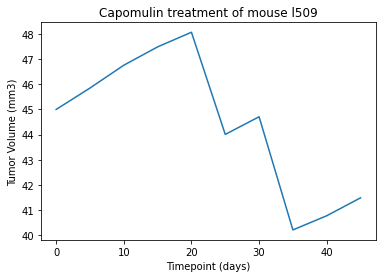

<Figure size 432x288 with 0 Axes>

In [254]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_table = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()
plt.savefig('linechart')

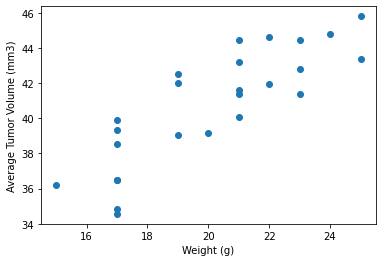

In [227]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average= Capomulin.groupby(['Mouse ID']).mean()
plt.scatter(average['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()


## Correlation and Regression

In [231]:
model=st.linregress(average['Weight (g)'],average['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [232]:
slope=0.9544396890241049
intercept=21.552160532685008

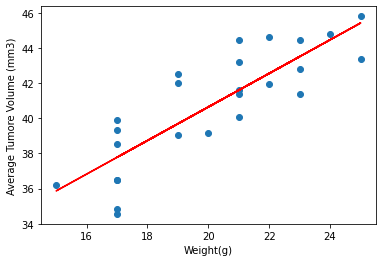

In [234]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(average['Weight (g)'],average['Tumor Volume (mm3)'])[0],2)
y_values = average['Weight (g)']*slope+intercept
plt.scatter(average['Weight (g)'],average['Tumor Volume (mm3)'])
plt.plot(average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()
